In [33]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline
import seaborn as sns
import datetime as dt

In [34]:
# Reading whale returns
whale_returns_csv = Path("whale_returns.csv")
whale_df = pd.read_csv(whale_returns_csv,index_col='Date',parse_dates=True,infer_datetime_format=True)
whale_df.sort_index(ascending=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [35]:
#Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [36]:
# Drop nulls
whale_df = whale_df.dropna()

In [37]:
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [38]:
# Reading algorithmic returns
algo_returns_csv = Path("algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv,parse_dates=True,index_col='Date',infer_datetime_format=True)
algo_df.sort_index(ascending=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [39]:
#Count nulls
algo_df.isnull().mean()*100
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [40]:
algo_df = algo_df.dropna()
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [41]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv,index_col='Date',parse_dates=True,infer_datetime_format=True)
sp500_df.sort_index(ascending=True,inplace=True)
sp500_df.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [42]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [43]:
#Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')

In [44]:
sp500_df['Close'] = sp500_df['Close'].astype('float')
sp500_df['Close'].dtypes

dtype('float64')

In [45]:
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [46]:
#check for nulls
sp500_daily_returns.isnull().sum()

Close    1
dtype: int64

In [47]:
#drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.isnull().sum()

Close    0
dtype: int64

In [48]:
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [49]:
sp500_daily_returns.columns = ['S&P 500']
sp500_daily_returns

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [50]:
combined_returns = pd.concat([sp500_daily_returns,algo_df,whale_df],axis='columns',join='inner')
combined_df

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916


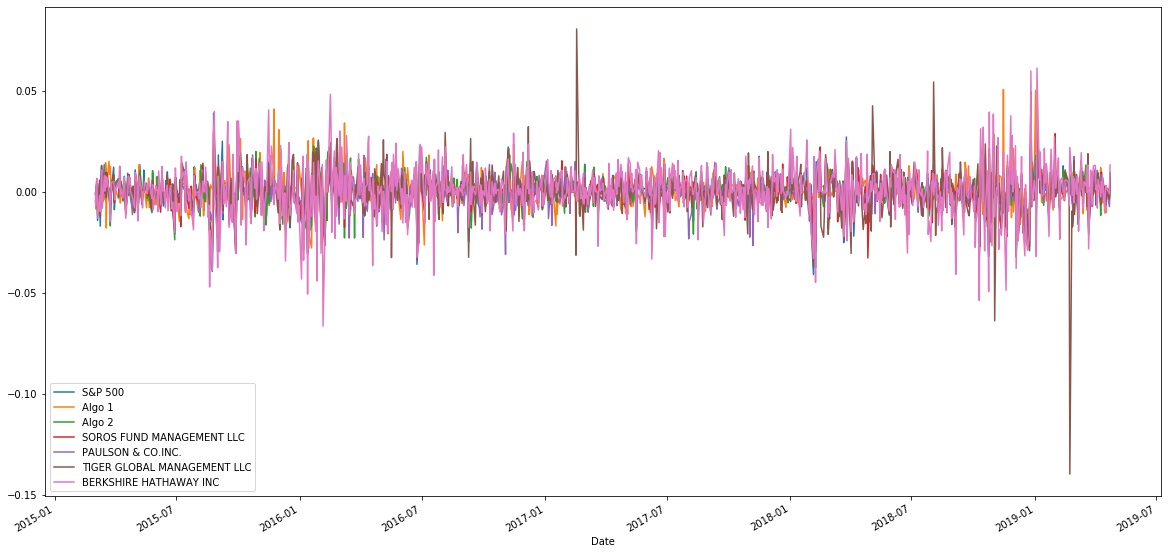

In [51]:
# Plot daily returns
combined_returns.plot(figsize=(20,10))
# YOUR CODE HERE

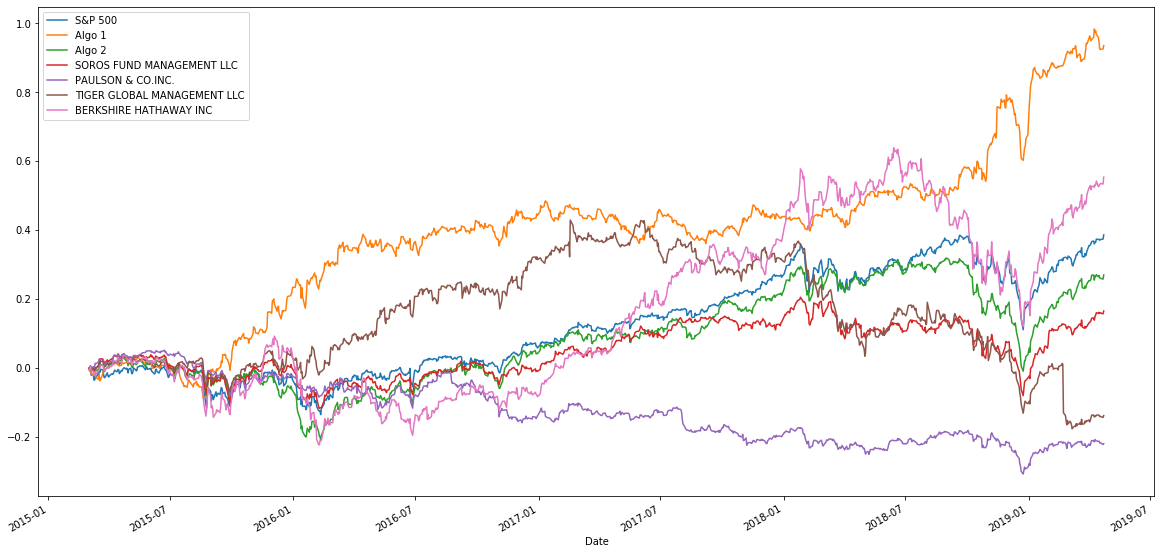

In [54]:
# Plot cumulative returns
cumulative_returns = (1 + combined_returns).cumprod() - 1
cumulative_returns.plot(figsize=(20,10))

In [ ]:
#Algo_1 and Berkshire_Hathaway have outperformed the S&P 500

In [58]:
# Box plot to visually show risk
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
# YOUR CODE HERE
daily_std = combined_returns.std()
daily_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010894
S&P 500                        0.008554
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
Algo 1                         0.007620
PAULSON & CO.INC.              0.007023
dtype: float64

In [ ]:
#Berkshire Hathaway Inc and Tiger Global Management are riskier than the S&P 500

In [61]:
annualized_std = daily_std * np.sqrt(252)
annualized_std.sort_values(ascending=False)

BERKSHIRE HATHAWAY INC         0.205077
TIGER GLOBAL MANAGEMENT LLC    0.172936
S&P 500                        0.135786
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
Algo 1                         0.120967
PAULSON & CO.INC.              0.111488
dtype: float64